# SHAP


## Prepare


In [9]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from common_eicu import KEY_IDENTITY, KEY_FLAG, CATEGORICAL_COLUMNS
from common_model import SEED


In [10]:
plt.rcParams['figure.facecolor'] = '#FFF'


In [4]:
df_data = pd.read_csv('./data/data_eicu_full.csv.gz')

# clamp infinite values
df_data.replace(np.inf, 9999, inplace=True)

# set categorical columns
for column_name in CATEGORICAL_COLUMNS:
    df_data[column_name] = df_data[column_name].astype('category')

# extract data
X = df_data.drop(columns=[KEY_IDENTITY, KEY_FLAG])
y = df_data[KEY_FLAG].ravel()


In [5]:
catboost_model = CatBoostClassifier(
    cat_features=CATEGORICAL_COLUMNS,
    task_type='GPU',
    devices='0',
    random_state=SEED,
    verbose=False,
)

catboost_model.fit(X, y)


In [6]:
explainer = shap.Explainer(catboost_model)
shap_values = explainer(X)


## Beeswarm


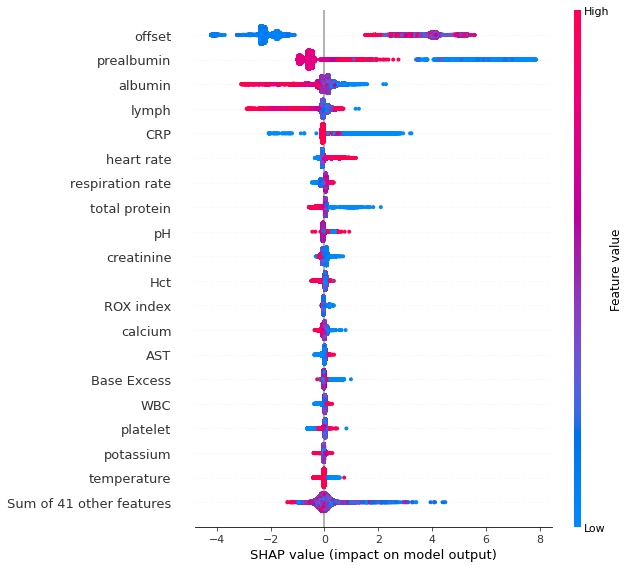

In [14]:
shap.plots.beeswarm(
    shap_values,
    max_display=20,
)


## Bar


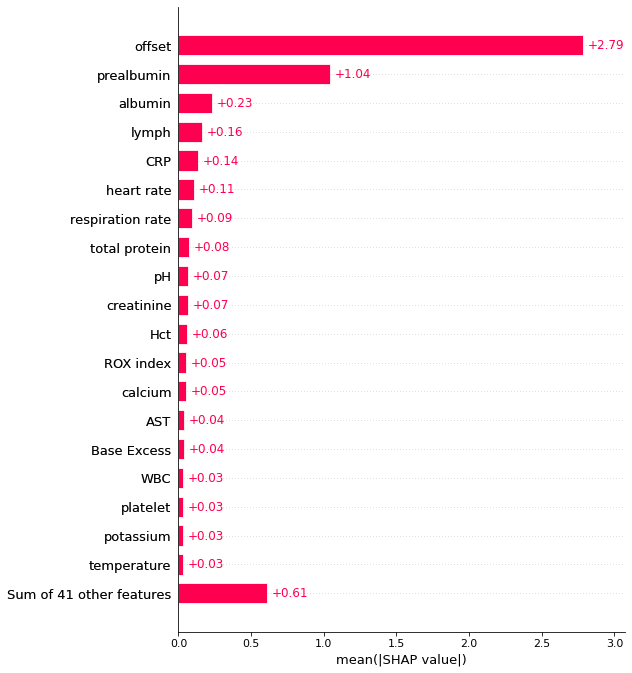

In [15]:
shap.plots.bar(
    shap_values,
    max_display=20,
)
